# SVM

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

### Read the data

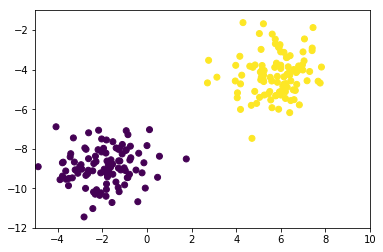

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0])

In [5]:
from sklearn.datasets.samples_generator import make_blobs

(X,y) =  make_blobs(n_samples=200,n_features=2,centers=2,cluster_std=1.05,random_state=40)
#we need to add 1 to X values (we can say its bias)

plt.scatter(X[:,0],X[:,1],marker='o',c=y)
plt.axis([-5,10,-12,-1])
plt.show()
y

### Normalize the data

In [6]:
y = y.reshape(-1,1)
n = np.where(y == 0)
y[n,0] = -1

mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X- mean) / std
x = np.insert(X, 0, 1,axis = 1)


### Split the data to train & test (70 - 30 split)

In [7]:
d = int(y.shape[0] * 0.7)

xtrain = x[:d]
xtest = x[d:]
ytrain = y[:d]
ytest = y[d:]

### Cost function

In [8]:
def cost(x,y,w,c):
    h =  c * np.sum( (1 - y * (np.matmul(x,w))).clip(min=0) )
    return (h +  np.dot(w.T,w)[0,0])
w = np.zeros((3,1))
cost(x,y,w,0.2)


40.0

### Gradient descent 

In [11]:
def gradient_descent(x, y, alpha, lamb, iterations):
    m = y.shape[0]
    cost_list = []
    grad_list = []
    w = np.zeros((x.shape[1],1))
    for i in range(1,iterations):
        for j, x_j in enumerate(x):
            if (y[j,0] * x_j * w).sum() < 1 :
                w = w + alpha * y[j,0] * x_j
                print(x_j)
            w1 = np.array(w,copy=True)
            w1[0]= 0
            w = w - alpha * lamb * w1

#         p =  np.where(y * (np.matmul(x,w)) < 1)[0]
#         h = ((x[p,:] * y[p,:]).sum(axis = 0)).reshape(-1,1)
#         w1 = np.array(w,copy=True)
#         w1[0]= 0
#         grad = h - (lamb) * w1
#         grad_list.append(grad)
#         w = w + (alpha) * grad
        
        cost_list.append(cost(x,y,w,lamb))
    return cost_list, grad_list, w

### Calling GD with alpha = 0.01 and iterations = 100

In [23]:
cost_list, grad_list, w = gradient_descent(xtrain, ytrain, 0.01, 0.1, 1000)

[ 1.         -1.23089847 -0.8830724 ]
[1.         0.91728072 0.79697902]
[1.         0.5285315  0.46141705]
[ 1.         -0.94465535 -0.3865795 ]
[ 1.         -1.29693835 -0.98649083]
[ 1.         -0.92280489 -0.88026333]
[ 1.         -0.89372556 -0.78471857]
[1.         1.05375798 0.73358119]
[ 1.         -1.24663013 -0.92559268]
[1.         0.90050715 0.87135995]
[1.         1.041964   0.69339235]
[1.         0.59339307 1.96959261]
[1.         1.15976888 0.62000687]
[1.         1.13107174 0.40432156]
[ 1.         -1.17643077 -1.09760033]
[1.         1.01876279 1.04838611]
[ 1.         -1.22153369 -0.97268247]
[1.         0.82523286 0.91691843]
[ 1.         -1.44093918 -0.84505309]
[ 1.         -1.34696781 -0.66204701]
[1.         1.10260185 1.08232921]
[1.         0.91996878 0.26120406]
[1.         0.89510188 0.58621081]
[ 1.         -0.88205689 -1.64270056]
[ 1.         -0.94509114 -1.37869907]
[1.         0.95111995 1.07091573]
[1.         0.96429851 0.50570392]
[1.         0.83397

[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.       

[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.      

[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.72174747 -0.58559166]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0

[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.87842935 0.53726189]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56

[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.72174747 -0.58559166]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.675

[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0

[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.

[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.72174747 -0.58559166]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0

[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.      

[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.72174747 -0.58559166]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0

[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.99

[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.87842935 0.53726189]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.       

[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.675

[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.87842935 0.53726189]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56

[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.72174747 -0.58559166]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.488

[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0

[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.72174747 -0.58559166]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.488

[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0

[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.87842935 0.53726189]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56

[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.       

[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.72174747 -0.58559166]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.       

[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.72174747 -0.58559166]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0

[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.87842935 0.53726189]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56

[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.87842935 0.53726189]
[1.         0

[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.581

[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.72174747 -0.58559166]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.

[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637

[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.      

[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.488

[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.99

[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637

[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.488

[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56

[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.         -0.70263192 -0.28022423]
[ 1.         -0.04550373 -0.7678894 ]
[ 1.         -0.34778657 -0.71324823]
[1.         0.78012227 0.46892543]
[1.         0.50662837 0.79773694]
[1.         0.5285315  0.46141705]
[1.         0.91996878 0.26120406]
[1.         0.83397266 0.51592669]
[1.         0.90637005 0.4174608 ]
[ 1.         -0.67518329 -0.51212399]
[ 1.         -0.58132437 -0.65311054]
[ 1.         -0.4881018  -0.49997232]
[ 1.         -0.45978929 -0.17957072]
[1.         0.56561221 0.73941188]
[1.         0.9948471  0.23069085]
[ 1.         -0.76551257 -0.47706031]
[ 1.         -0.72219924 -0.20033825]
[1.         0.29950333 0.87438792]
[ 1.      

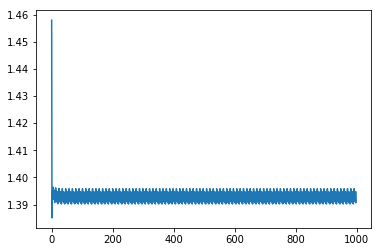

In [24]:
plt.plot(cost_list)


### Drawing decision boundary

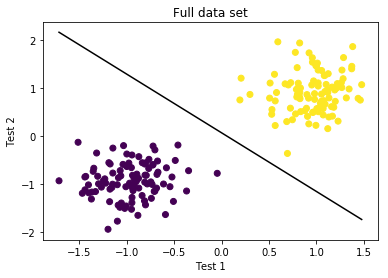

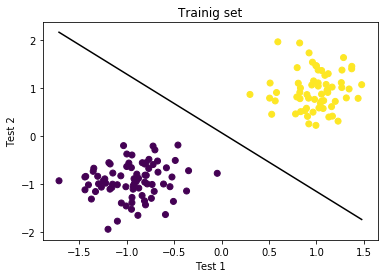

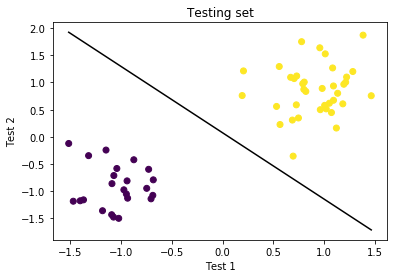

In [25]:
def plot(X,Y,w,title):
    plt.title(title)
    plt.xlabel('Test 1')
    plt.ylabel('Test 2')
    classes = Y.reshape(-1,)
    plt.scatter(X[:,1], X[:,2],c=classes)
    
    linex = [min(X[:,1]),max(X[:,1])]
    liney = [(-w[0,0] -w[1,0] * i)/w[2,0] for i in linex]
    plt.plot(linex, liney,'k')
    plt.show()
plot(x,y,w,'Full data set')
plot(xtrain,ytrain,w,'Trainig set')
plot(xtest,ytest,w,'Testing set')

In [26]:
def avg_error(x, y, w):
    h = np.dot(x, w) > 0
    e = np.abs(h - y.clip(min = 0)).sum()
    #print(h.T)
    #print(y.T)
    #print(h - y.clip(min = 0))
    return (e)

In [27]:
avg_error(x,y,w)

0

In [28]:
cost(xtest,ytest,w,5)

13.679510419026775

In [29]:
w

array([[-0.05      ],
       [ 0.80697626],
       [ 0.66056118]])

In [30]:
p =  np.where(y * (np.matmul(x,w)) < 0) [0]
h = (x[p,:] * y[p,:]).sum(axis = 0)
h

array([0., 0., 0.])

In [31]:
p

array([], dtype=int64)